#### Abstract
This script performs exploratory data analysis on an automobile dataset. It includes data cleaning, preprocessing, and visualization techniques to uncover insights about various car attributes. 
The analysis explores relationships between price, horsepower, fuel efficiency, and other features across different car makes and models. 
Key visualizations include comparisons of expensive vs. cheap cars, popular car makes, fuel efficiency rankings, and the impact of engine location on price. 
The script utilizes Python libraries such as pandas, matplotlib, and seaborn to process the data and create informative graphs. 
The findings provide valuable insights into the automotive market, including trends in pricing, performance, and consumer preferences.

Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import csv

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#### Convert text to numbers

Create a dictionary to map words to numbers

In [2]:
# Cylinder dictionary to convert numerical words to numbers
cylinder_map = {
    'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'eight': 8, 'twelve': 12
}

In [3]:
# Create a function to replace '?' with NaN and convert numerical words to numbers
def convert_automobile_to_csv(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile, quoting=csv.QUOTE_MINIMAL)
        
        for row in reader:
            # Replace '?' with 'NaN' for missing values
            processed_row = ['NaN' if field == '?' else field for field in row]
            
            # Convert cylinder words to numbers (16th column, index 15)
            if len(processed_row) > 15 and processed_row[15].lower() in cylinder_map:
                processed_row[15] = str(cylinder_map[processed_row[15].lower()])
            
            writer.writerow(processed_row)
    print(f"Conversion complete. CSV file saved as {output_file}")

In [4]:
# Convert the '.txt' data set to a '.csv' data set
convert_automobile_to_csv('automobile.txt', 'automobile.csv')

Conversion complete. CSV file saved as automobile.csv


In [5]:
# Load the automobile dataset
automobiles_df = pd.read_csv('automobile.csv')

In [6]:
# Display the shape of the dataset to get a better sense of the data
automobiles_df.shape

(205, 26)

In [7]:
# Display the first few rows to get a better sense of the data
automobiles_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
# Display the data types rows to get a better sense of the data
automobiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

### Data Cleansing

#### Identify NaN values in the columns
Create a function to identify these missing values

In [9]:
def analyze_nan_values(df):
    
    # Check the total number of NaN values in the entire dataset
    total_nan = df.isna().sum().sum()
    print(f"Total number of NaN values in the dataset: {total_nan}")

    # Check for NaN values in each column
    nan_counts = df.isna().sum()
    columns_with_nan = nan_counts[nan_counts > 0]

    if len(columns_with_nan) > 0:
        print("\nColumns with NaN values:")
        for column, count in columns_with_nan.items():
            print(f"{column}: {count} NaN values")
    else:
        print("\nNo columns contain NaN values.")

    # Check the percentage of NaN values in each column
    nan_percentages = (df.isna().sum() / len(df)) * 100
    columns_with_nan_percentage = nan_percentages[nan_percentages > 0]

#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise.

In [10]:
# Remove unnecessary columns
columns_to_remove = ['symboling', 'normalized-losses', 'aspiration', 'bore', 'stroke', 'compression-ratio','curb-weight', 'engine-type', 'length', 'width', 'height', 'num-of-doors', 'fuel-system']
automobiles_df = automobiles_df.drop(columns=columns_to_remove)

In [11]:
# Check if the columns are removed
automobiles_df.head()

,make,fuel-type,body-style,drive-wheels,engine-location,wheel-base,num-of-cylinders,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,convertible,rwd,front,88.6,4,130,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,convertible,rwd,front,88.6,4,130,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,hatchback,rwd,front,94.5,6,152,154.0,5000.0,19,26,16500.0
3,audi,gas,sedan,fwd,front,99.8,4,109,102.0,5500.0,24,30,13950.0
4,audi,gas,sedan,4wd,front,99.4,5,136,115.0,5500.0,18,22,17450.0


#### Remove any duplicate rows

In [12]:
# Remove duplicate rows
automobiles_df = automobiles_df.drop_duplicates()

In [13]:
# Check the shape of the dataset after the removal of duplicates
automobiles_df.shape

(203, 13)

#### Remove rows with missing data 

Some cars in the database have unknown price which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [14]:
# Check for missing values in the 'price', 'horsepower', and 'peak-rpm' columns
print("Number of rows with missing values before removal:")
print("Price:", automobiles_df['price'].isna().sum())
print("Horsepower:", automobiles_df['horsepower'].isna().sum())
print("Peak RPM:", automobiles_df['peak-rpm'].isna().sum())

Number of rows with missing values before removal:
Price: 3
Horsepower: 2
Peak RPM: 2


In [15]:
# Remove rows with missing values in price, horsepower, and peak-rpm
automobiles_df.drop(automobiles_df.index[
    pd.isna(automobiles_df['price']) |
    pd.isna(automobiles_df['horsepower']) |
    pd.isna(automobiles_df['peak-rpm'])
], axis=0, inplace=True)

In [16]:
# Make sure there are no NaN values:
analyze_nan_values(automobiles_df)

Total number of NaN values in the dataset: 0

No columns contain NaN values.


In [17]:
# Display information about the dataset after cleaning
print("\nDataset information after cleaning:")
automobiles_df.shape


Dataset information after cleaning:


(198, 13)

In [18]:
# Display summary statistics of the cleaned dataset
print("\nSummary statistics of the cleaned dataset:")
automobiles_df.describe()


Summary statistics of the cleaned dataset:


,wheel-base,num-of-cylinders,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,98.836869,4.368687,126.909091,103.333333,5115.656566,25.212121,30.686869,13263.454545
std,6.103615,1.066533,41.841517,37.638273,480.964897,6.466270,6.866599,7993.918809
min,86.600000,2.000000,61.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,4.000000,97.250000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,97.000000,4.000000,119.500000,95.000000,5150.000000,24.500000,30.000000,10470.000000
75%,102.400000,4.000000,144.000000,116.000000,5500.000000,30.000000,34.000000,16502.250000
max,120.900000,12.000000,326.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


#### Change data types
Change columns to a integer data type using numpy’s `int64` method.

In [19]:
# Convert the following data to int64
automobiles_df['price'] = automobiles_df['price'].astype(np.int64)
automobiles_df['horsepower'] = automobiles_df['horsepower'].astype(np.int64)
automobiles_df['peak-rpm'] = automobiles_df['peak-rpm'].astype(np.int64)

In [20]:
# Check if the datatypes did change
automobiles_df.dtypes

make                 object
fuel-type            object
body-style           object
drive-wheels         object
engine-location      object
wheel-base          float64
num-of-cylinders      int64
engine-size           int64
horsepower            int64
peak-rpm              int64
city-mpg              int64
highway-mpg           int64
price                 int64
dtype: object

In [21]:
# Check the dataset shape
automobiles_df.shape  

(198, 13)

#### Check the dataset for JSON formating. If it contains JSON then flatten these columns to be easily interpreted.

In [22]:
# Create a function to check the columns for JSON formatting
def check_json_columns(csv_file, sample_size=5):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    json_columns = []
    
    for column in df.columns:
        json_count = 0
        
        # Check a sample of values in the column
        for value in df[column].dropna().head(sample_size):
            try:
                # Attempt to parse the value as JSON
                json.loads(value)
                json_count += 1
            except (json.JSONDecodeError, TypeError):
                # If it fails to parse, it's not JSON
                pass
        
        # If most of the sampled values are JSON, consider the column as JSON
        if json_count >= sample_size // 2:
            json_columns.append(column)
    
    return json_columns

In [23]:
# Use the function
csv_file = 'automobile.csv'
json_columns = check_json_columns(csv_file)

print("Columns likely in JSON format:")
for column in json_columns:
    print(f"- {column}")

Columns likely in JSON format:


In [24]:
# Display a sample of each JSON column
if json_columns:
    df = pd.read_csv(csv_file)
    for column in json_columns:
        print(f"\nSample of '{column}':")
        print(df[column].head())

There are no JSON formatted columns

### Finding Certain Genres
Locate all the 'audi' cars in the "make" column 

In [25]:
# Create a dataframe with all the Audi cars in the "make" column
audi_cars = automobiles_df[automobiles_df['make'].str.lower() == 'audi']

In [26]:
# Display the first few rows of the Audi cars dataframe
print(audi_cars.head())

   make fuel-type body-style drive-wheels engine-location  wheel-base  \
3  audi       gas      sedan          fwd           front        99.8   
4  audi       gas      sedan          4wd           front        99.4   
5  audi       gas      sedan          fwd           front        99.8   
6  audi       gas      sedan          fwd           front       105.8   
7  audi       gas      wagon          fwd           front       105.8   

   num-of-cylinders  engine-size  horsepower  peak-rpm  city-mpg  highway-mpg  \
3                 4          109         102      5500        24           30   
4                 5          136         115      5500        18           22   
5                 5          136         110      5500        19           25   
6                 5          136         110      5500        19           25   
7                 5          136         110      5500        19           25   

   price  
3  13950  
4  17450  
5  15250  
6  17710  
7  18920  


In [27]:
# Display the number of Audi cars in the dataset
print(f"Number of Audi cars: {len(audi_cars)}")

Number of Audi cars: 6


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the most expensive cars? 

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some cars are worth the money spent on them based on their price and horsepower.

In [28]:
# Find the 5 most expensive cars
most_expensive_cars = automobiles_df.nlargest(5, 'price')

In [29]:
# Find the 5 cheapest cars
cheapest_cars = automobiles_df.nsmallest(5, 'price')

In [30]:
# Display the results
print("5 Most Expensive Cars:")
print(most_expensive_cars[['make', 'price', 'horsepower']])
print("\n5 Cheapest Cars:")
print(cheapest_cars[['make', 'price', 'horsepower']])

5 Most Expensive Cars:
              make  price  horsepower
74   mercedes-benz  45400         184
16             bmw  41315         182
73   mercedes-benz  40960         184
128        porsche  37028         207
17             bmw  36880         182

5 Cheapest Cars:
           make  price  horsepower
138      subaru   5118          69
18    chevrolet   5151          48
50        mazda   5195          68
150      toyota   5348          62
76   mitsubishi   5389          68


In [31]:
# Calculate price per horsepower for each group
expensive_price_per_hp = most_expensive_cars['price'] / most_expensive_cars['horsepower']
cheap_price_per_hp = cheapest_cars['price'] / cheapest_cars['horsepower']

In [32]:
# Print price per horsepower for most expensive cars
print("\nPrice per Horsepower for Most Expensive Cars:")
print(expensive_price_per_hp)


Price per Horsepower for Most Expensive Cars:
74     246.739130
16     227.005495
73     222.608696
128    178.879227
17     202.637363
dtype: float64


In [33]:
# Print price per horsepower for cheapest cars
print("\nPrice per Horsepower for Cheapest Cars:")
print(cheap_price_per_hp)


Price per Horsepower for Cheapest Cars:
138     74.173913
18     107.312500
50      76.397059
150     86.258065
76      79.250000
dtype: float64


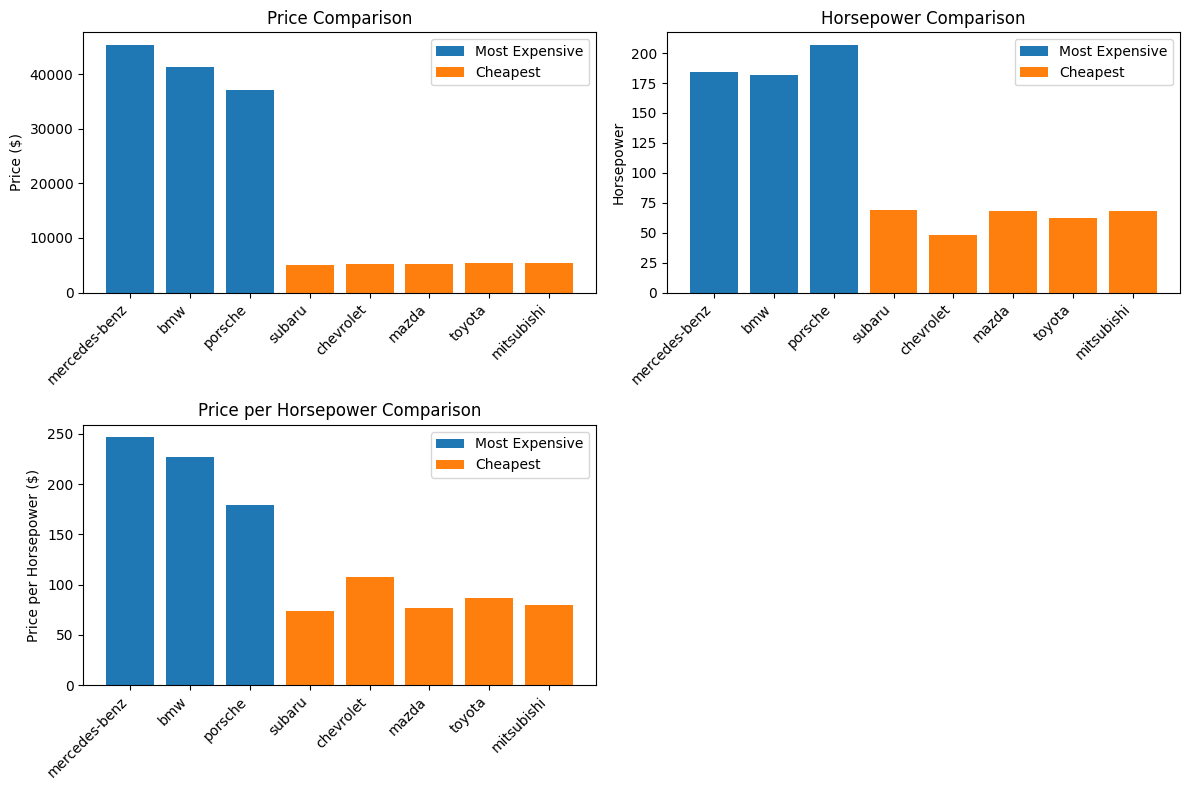

In [34]:
# Visualize the comparison
plt.figure(figsize=(12, 8))

# Price comparison
plt.subplot(2, 2, 1)
plt.bar(most_expensive_cars['make'], most_expensive_cars['price'], label='Most Expensive')
plt.bar(cheapest_cars['make'], cheapest_cars['price'], label='Cheapest')
plt.title('Price Comparison')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Horsepower comparison
plt.subplot(2, 2, 2)
plt.bar(most_expensive_cars['make'], most_expensive_cars['horsepower'], label='Most Expensive')
plt.bar(cheapest_cars['make'], cheapest_cars['horsepower'], label='Cheapest')
plt.title('Horsepower Comparison')
plt.ylabel('Horsepower')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Price per Horsepower comparison
plt.subplot(2, 2, 3)
plt.bar(most_expensive_cars['make'], expensive_price_per_hp, label='Most Expensive')
plt.bar(cheapest_cars['make'], cheap_price_per_hp, label='Cheapest')
plt.title('Price per Horsepower Comparison')
plt.ylabel('Price per Horsepower ($)')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

#### Answer
The most expensive car makes are: Mercedes Benz, BMW and Porsche and the cheapest are: Subaru, Chevrolet, Mazda, Toyota and Mitsubishi.
When considering price per horsepower, Porsche would be a great car if you do want a luxury car but do not want to pay top dollar and if you want a car with relatively high horsepower. 
When you want to buy a car that is cheap but want a car with as high as possible horsepower then the Chevrolet make would be a good consideration.

#### What are the top 5 most popular cars make? 

This comparison will uncover which make of cars are the most popular

In [35]:
# Count the occurrences of each make
car_counts = automobiles_df['make'].value_counts()

In [36]:
# Get the top 5 most sold cars
top_5_popular = car_counts.head(5)

In [37]:
# Print the top 5 most sold cars
print("Top 5 Most Sold Cars:")
print(top_5_popular)

Top 5 Most Sold Cars:
make
toyota    32
nissan    18
mazda     17
honda     13
subaru    12
Name: count, dtype: int64


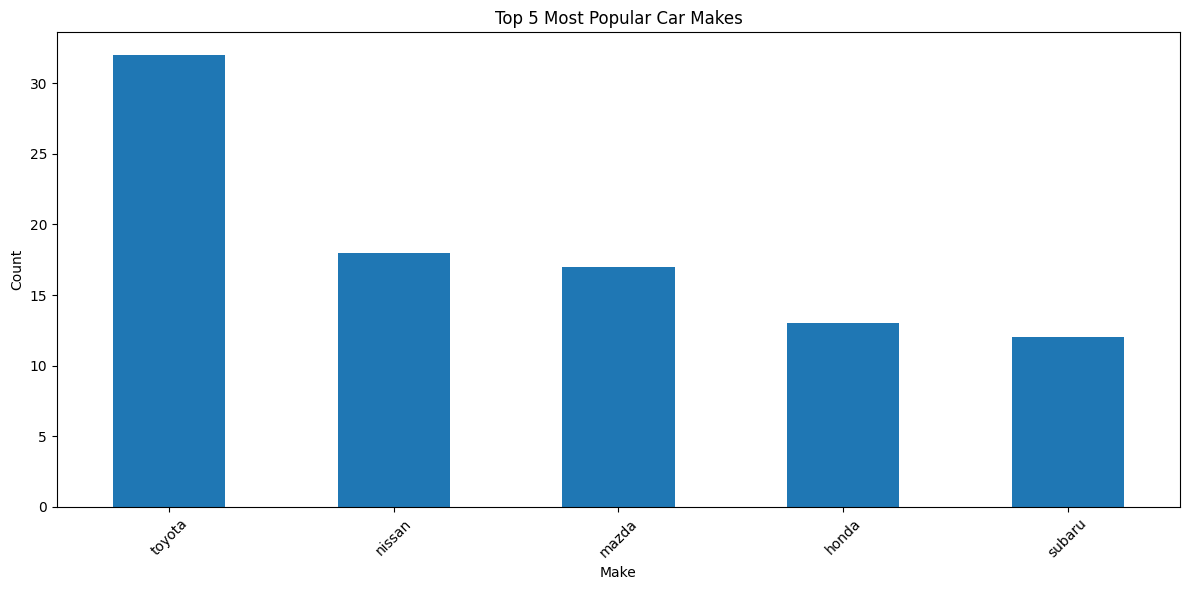

In [38]:
# Visualize the results
plt.figure(figsize=(12, 6))
top_5_popular.plot(kind='bar')
plt.title('Top 5 Most Popular Car Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Answer
Toyota is the most popular car brand.

In [39]:
# Calculate the percentage of total for each top make
total_cars = len(automobiles_df)
percentages = (top_5_popular / total_cars) * 100

In [40]:
# Print findings
print("\nPercentage of Total Cars:")
for make, percentage in percentages.items():
    print(f"{make}: {percentage:.2f}%")


Percentage of Total Cars:
toyota: 16.16%
nissan: 9.09%
mazda: 8.59%
honda: 6.57%
subaru: 6.06%


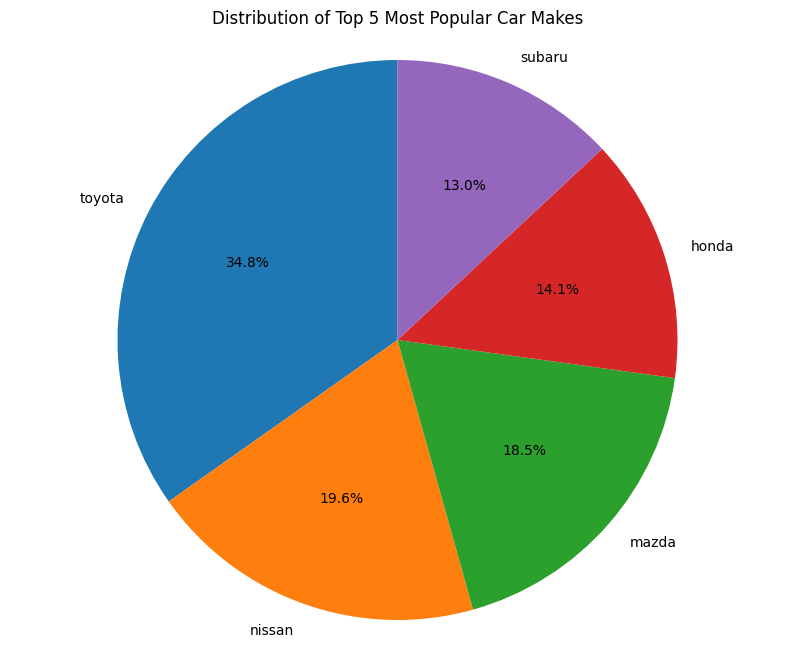

In [41]:
# Pie chart to show the distribution
plt.figure(figsize=(10, 8))
plt.pie(top_5_popular, labels=top_5_popular.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top 5 Most Popular Car Makes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#### Find the car make with the highest average MPG 

In [42]:
# Create a new column for average MPG
automobiles_df['avg_mpg'] = (automobiles_df['city-mpg'] + automobiles_df['highway-mpg']) / 2

In [43]:
# Group by make and calculate average MPG for each make
make_avg_mpg = automobiles_df.groupby('make')['avg_mpg'].mean().sort_values(ascending=False)

In [44]:
# Display the 5 makes with the highest average MPG
print("5 Car Makes with Highest Average MPG:")
print(make_avg_mpg.head())

5 Car Makes with Highest Average MPG:
make
chevrolet     43.666667
honda         32.923077
volkswagen    31.750000
plymouth      31.142857
dodge         31.055556
Name: avg_mpg, dtype: float64


In [45]:
# Find the make with the highest average MPG
highest_mpg_make = make_avg_mpg.index[0]
highest_mpg_value = make_avg_mpg.iloc[0]
print(f"\nCar Make with Highest Average MPG: {highest_mpg_make}")
print(f"Highest Average MPG: {highest_mpg_value:.2f}")


Car Make with Highest Average MPG: chevrolet
Highest Average MPG: 43.67


In [46]:
# Find the car with the highest individual MPG
highest_mpg_car = automobiles_df.loc[automobiles_df['avg_mpg'].idxmax()]
print(f"\nCar Make with Highest Individual MPG: {highest_mpg_car['make']}")
print(f"Highest Individual MPG: {highest_mpg_car['avg_mpg']:.2f}")
print(f"City MPG: {highest_mpg_car['city-mpg']}")
print(f"Highway MPG: {highest_mpg_car['highway-mpg']}")



Car Make with Highest Individual MPG: honda
Highest Individual MPG: 51.50
City MPG: 49
Highway MPG: 54


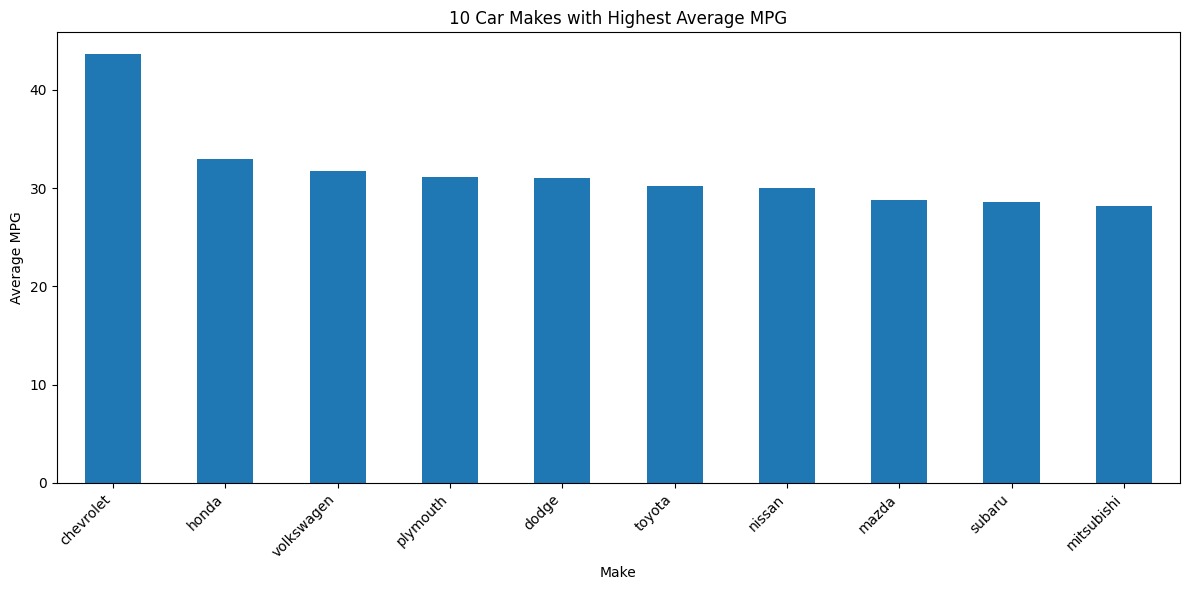

In [47]:
# Visualize the 10 makes with the highest average MPG
plt.figure(figsize=(12, 6))
make_avg_mpg.head(10).plot(kind='bar')
plt.title('10 Car Makes with Highest Average MPG')
plt.xlabel('Make')
plt.ylabel('Average MPG')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

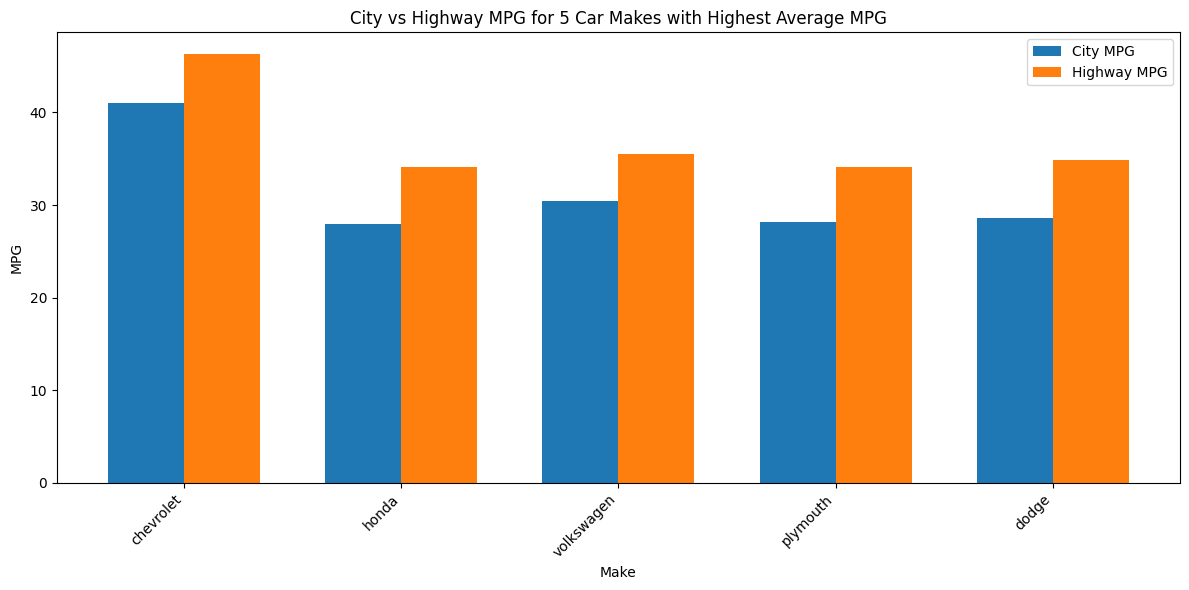

In [48]:
# Compare city and highway MPG for the top 5 makes
top_5_makes = make_avg_mpg.head().index
city_mpg = automobiles_df[automobiles_df['make'].isin(top_5_makes)].groupby('make')['city-mpg'].mean()
highway_mpg = automobiles_df[automobiles_df['make'].isin(top_5_makes)].groupby('make')['highway-mpg'].mean()

plt.figure(figsize=(12, 6))
x = range(len(top_5_makes))
width = 0.35
plt.bar([i - width/2 for i in x], city_mpg, width, label='City MPG')
plt.bar([i + width/2 for i in x], highway_mpg, width, label='Highway MPG')
plt.title('City vs Highway MPG for 5 Car Makes with Highest Average MPG')
plt.xlabel('Make')
plt.ylabel('MPG')
plt.xticks(x, top_5_makes, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

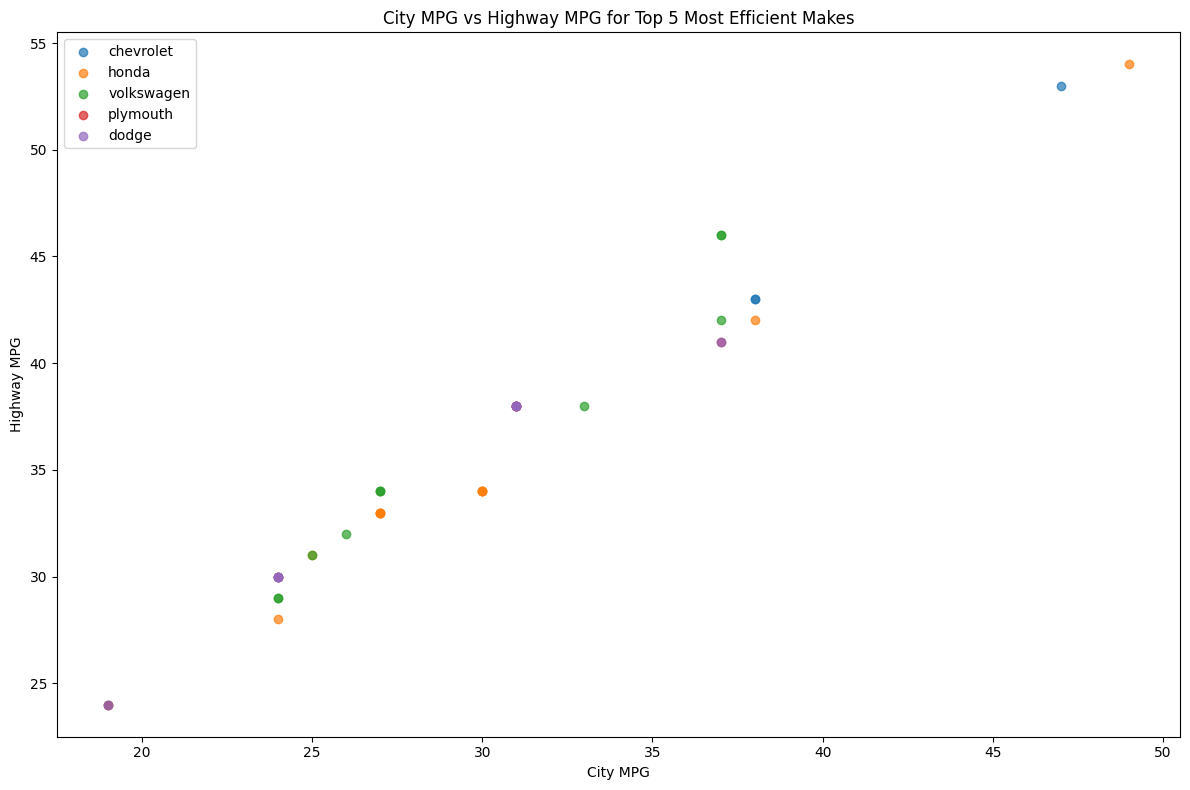

In [49]:
# Scatter plot of city MPG vs highway MPG
plt.figure(figsize=(12, 8))
for make in top_5_makes:
    make_data = automobiles_df[automobiles_df['make'] == make]
    plt.scatter(make_data['city-mpg'], make_data['highway-mpg'], label=make, alpha=0.7)

plt.title('City MPG vs Highway MPG for Top 5 Most Efficient Makes')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.legend()
plt.tight_layout()
plt.show()

#### Answer
The car make to consider when you want to buy a car with a high average MPG or individual MPG are Chevrolet or Honda respectively.

#### How many cars have engines at the front vs at the back and what is the average price difference?

In [50]:
# Count the number of cars with front and rear engines
engine_location_counts = automobiles_df['engine-location'].value_counts()

print("Number of cars by engine location:")
print(engine_location_counts)

Number of cars by engine location:
engine-location
front    195
rear       3
Name: count, dtype: int64


In [51]:
# Calculate the average price for each engine location
avg_price_by_location = automobiles_df.groupby('engine-location')['price'].mean()

print("\nAverage price by engine location:")
print(avg_price_by_location)


Average price by engine location:
engine-location
front    12936.307692
rear     34528.000000
Name: price, dtype: float64


In [52]:
# Calculate the price difference
price_difference = avg_price_by_location['rear'] - avg_price_by_location['front']

print(f"\nPrice difference (Rear - Front): ${price_difference:,.2f}")


Price difference (Rear - Front): $21,591.69


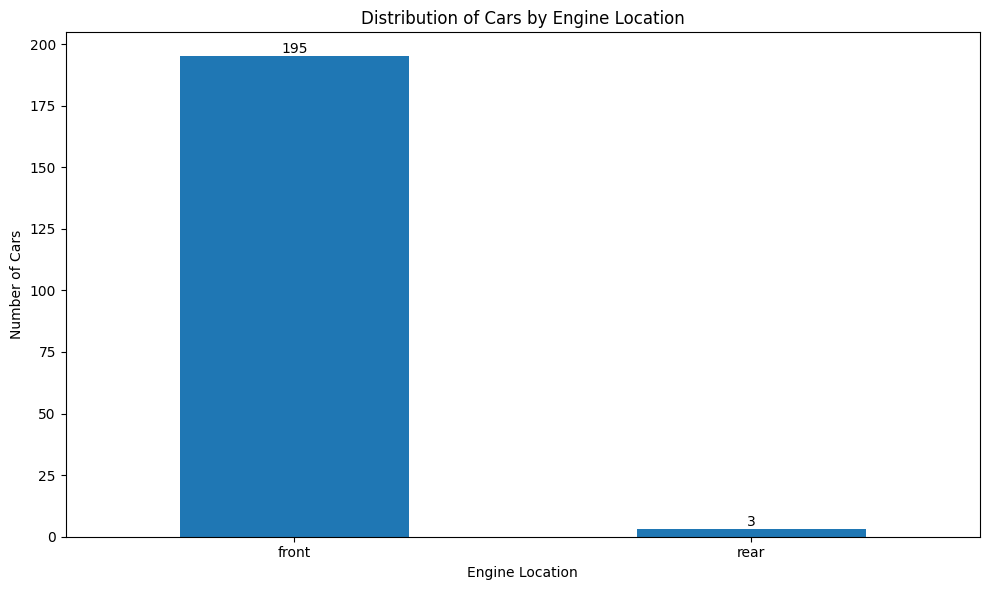

In [53]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
engine_location_counts.plot(kind='bar')
plt.title('Distribution of Cars by Engine Location')
plt.xlabel('Engine Location')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
for i, v in enumerate(engine_location_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

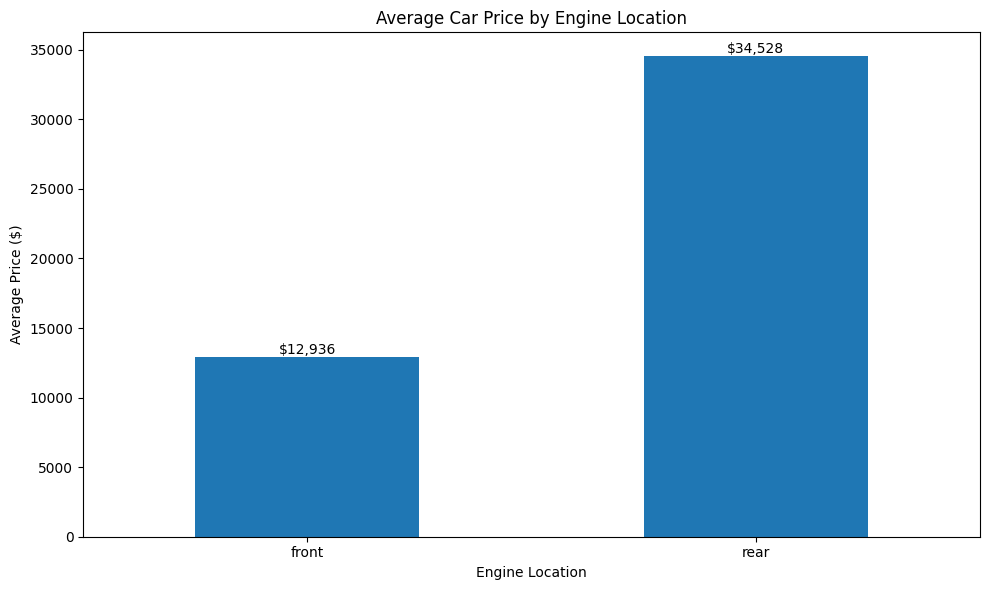

In [54]:
# Visualize the average prices
plt.figure(figsize=(10, 6))
avg_price_by_location.plot(kind='bar')
plt.title('Average Car Price by Engine Location')
plt.xlabel('Engine Location')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
for i, v in enumerate(avg_price_by_location):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### Answer
When considering car engines in the front of the car there are 195 cars with this configuration. Only 3 cars have engines at the back.
Cars with engines in the back of the vehicle are considerably more expensive. The average price difference is $21,591.69.

#### Most common body type by car make
Create a bar plot explaining the frequency of body types in each make.
What is the most common body type?

In [55]:
# Get the counts of body types for each make
body_type_counts = automobiles_df.groupby(['make', 'body-style']).size().unstack(fill_value=0)

In [56]:
# Sort the makes by total count in descending order
make_totals = body_type_counts.sum(axis=1).sort_values(ascending=False)
body_type_counts_sorted = body_type_counts.loc[make_totals.index]

<Figure size 2000x1200 with 0 Axes>

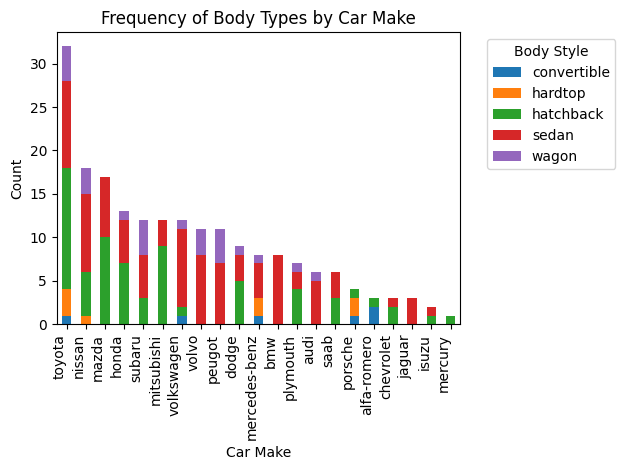

In [57]:
# Create a stacked bar plot for all makes, sorted by total count
plt.figure(figsize=(20, 12))
body_type_counts_sorted.plot(kind='bar', stacked=True)
plt.title('Frequency of Body Types by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.legend(title='Body Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [58]:
# Calculate the percentage of each body type within each make
body_type_percentages = body_type_counts_sorted.div(body_type_counts_sorted.sum(axis=1), axis=0) * 100

<Figure size 2000x1200 with 0 Axes>

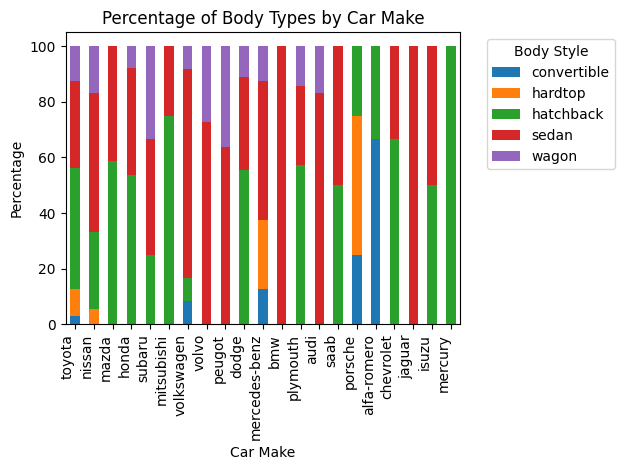

In [59]:
# Create a 100% stacked bar plot for all makes, sorted by total count
plt.figure(figsize=(20, 12))
body_type_percentages.plot(kind='bar', stacked=True)
plt.title('Percentage of Body Types by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Percentage')
plt.legend(title='Body Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [60]:
# Find the most common body type for each make
most_common_body_type = body_type_counts_sorted.idxmax(axis=1)
print("Most common body type for each make)")
print(most_common_body_type)

Most common body type for each make)
make
toyota             hatchback
nissan                 sedan
mazda              hatchback
honda              hatchback
subaru                 sedan
mitsubishi         hatchback
volkswagen             sedan
volvo                  sedan
peugot                 sedan
dodge              hatchback
mercedes-benz          sedan
bmw                    sedan
plymouth           hatchback
audi                   sedan
saab               hatchback
porsche              hardtop
alfa-romero      convertible
chevrolet          hatchback
jaguar                 sedan
isuzu              hatchback
mercury            hatchback
dtype: object


In [61]:
# Calculate the overall most common body type
overall_most_common = automobiles_df['body-style'].mode()[0]
print(f"\nOverall most common body type: {overall_most_common}")


Overall most common body type: sedan


In [62]:
# Display the number of makes in the dataset
num_makes = len(body_type_counts_sorted)
print(f"\nTotal number of car makes in the dataset: {num_makes}")


Total number of car makes in the dataset: 21


In [63]:
# Display the top 5 makes by production volume
top_5_makes = make_totals.head()
print("\nTop 5 makes by production volume:")
print(top_5_makes)


Top 5 makes by production volume:
make
toyota    32
nissan    18
mazda     17
honda     13
subaru    12
dtype: int64


#### Answer
The most common body type is a Sedan.

#### Provide 3 extra visualizations

In [64]:
# Calculate average MPG and group by make
make_avg = automobiles_df.groupby('make').agg({
    'avg_mpg': 'mean',
    'peak-rpm': 'mean'
}).reset_index()

In [65]:
# Sort the dataframe by average MPG for consistent color mapping
make_avg_sorted = make_avg.sort_values('avg_mpg', ascending=False)

In [66]:
# Create a color palette for the makes
color_palette = sns.color_palette("husl", n_colors=len(make_avg_sorted))

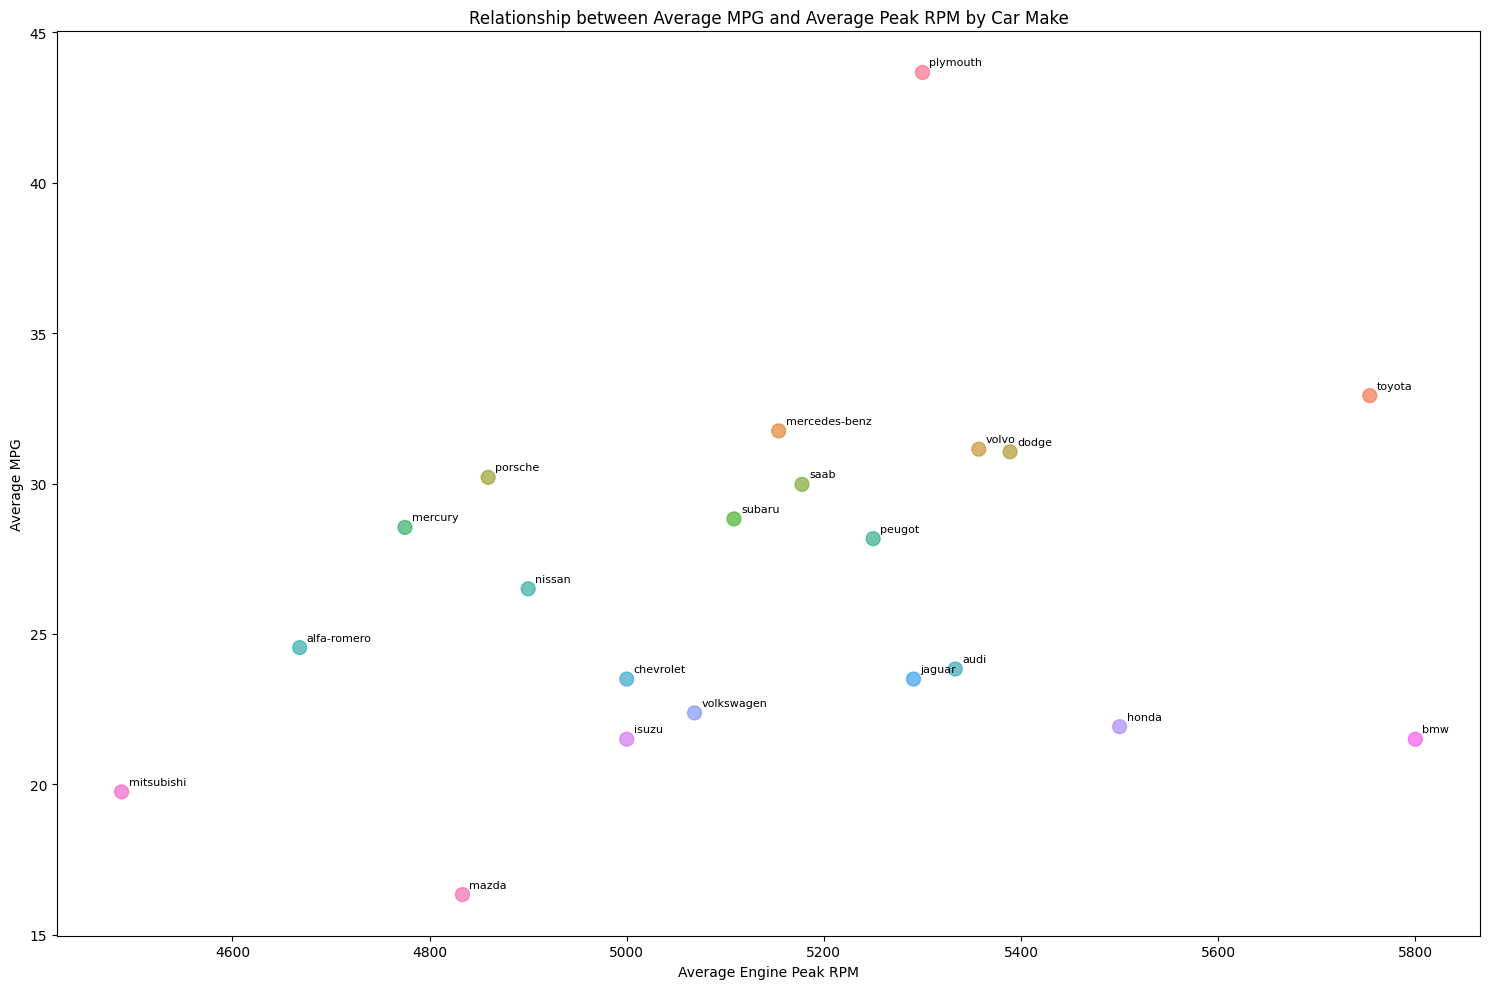

In [67]:
# Create the scatter plot
plt.figure(figsize=(15, 10))
scatter = plt.scatter(make_avg_sorted['peak-rpm'], make_avg_sorted['avg_mpg'], 
                      c=color_palette, s=100, alpha=0.7)

# Add labels for each point
for i, make in enumerate(make_avg_sorted['make']):
    plt.annotate(make, (make_avg_sorted['peak-rpm'][i], make_avg_sorted['avg_mpg'][i]),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)
    
plt.xlabel('Average Engine Peak RPM')
plt.ylabel('Average MPG')
plt.title('Relationship between Average MPG and Average Peak RPM by Car Make')
plt.tight_layout()
plt.show()

In [68]:
# Calculate correlation between average RPM and average MPG
correlation = make_avg['peak-rpm'].corr(make_avg['avg_mpg'])
print(f"Correlation between average RPM and average MPG: {correlation:.2f}")

Correlation between average RPM and average MPG: 0.29


In [69]:
# Display top 5 makes by average MPG
print("\nTop 5 makes by average MPG:")
print(make_avg.sort_values('avg_mpg', ascending=False)[['make', 'avg_mpg']].head())


Top 5 makes by average MPG:
          make    avg_mpg
3    chevrolet  43.666667
5        honda  32.923077
19  volkswagen  31.750000
14    plymouth  31.142857
4        dodge  31.055556


In [70]:
# Display top 5 makes by average RPM
print("\nTop 5 makes by average RPM:")
print(make_avg.sort_values('peak-rpm', ascending=False)[['make', 'peak-rpm']].head())


Top 5 makes by average RPM:
        make     peak-rpm
15   porsche  5800.000000
5      honda  5753.846154
1       audi  5500.000000
4      dodge  5388.888889
14  plymouth  5357.142857


In [71]:
# Calculate average values for each make
make_avg = automobiles_df.groupby('make').agg({
    'city-mpg': 'mean',
    'highway-mpg': 'mean',
    'horsepower': 'mean',
    'price': 'mean'
}).reset_index()

make_avg['avg_mpg'] = (make_avg['city-mpg'] + make_avg['highway-mpg']) / 2

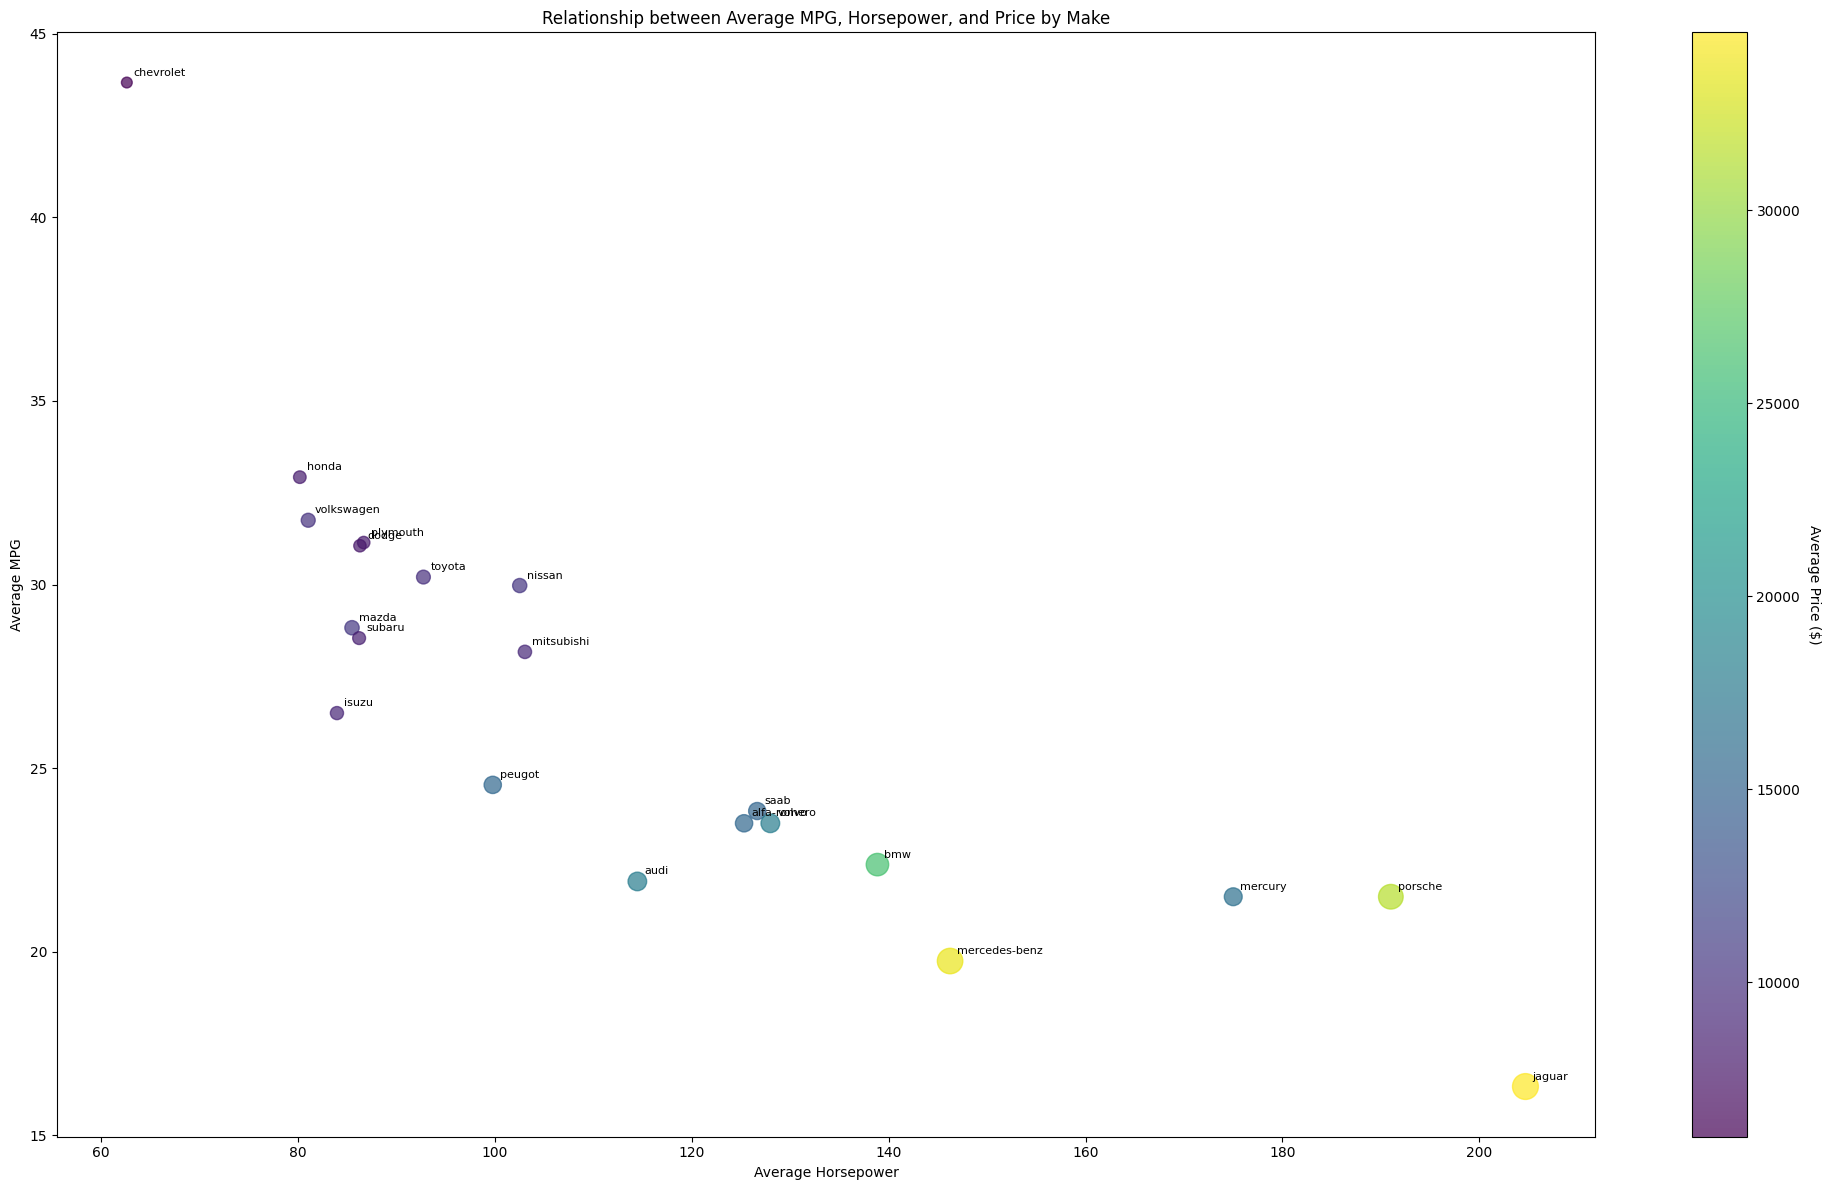

In [72]:
# Create a color palette for the makes
color_palette = sns.color_palette("husl", n_colors=len(make_avg))
color_dict = dict(zip(make_avg['make'], color_palette))

# Create the scatter plot
plt.figure(figsize=(20, 12))

scatter = plt.scatter(make_avg['horsepower'], make_avg['avg_mpg'], 
                      s=make_avg['price'] / 100, 
                      c=make_avg['price'], cmap='viridis', alpha=0.7)

plt.xlabel('Average Horsepower')
plt.ylabel('Average MPG')
plt.title('Relationship between Average MPG, Horsepower, and Price by Make')

# Add a colorbar to represent price
cbar = plt.colorbar(scatter)
cbar.set_label('Average Price ($)', rotation=270, labelpad=15)

# Add labels for each make
for i, make in enumerate(make_avg['make']):
    plt.annotate(make, (make_avg['horsepower'][i], make_avg['avg_mpg'][i]),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

In [73]:
# Calculate correlations
corr_hp_mpg = make_avg['horsepower'].corr(make_avg['avg_mpg'])
corr_hp_price = make_avg['horsepower'].corr(make_avg['price'])
corr_mpg_price = make_avg['avg_mpg'].corr(make_avg['price'])

# Print the correlations
print("Key Findings:")
print(f"1. Correlation between Average Horsepower and Average MPG: {corr_hp_mpg:.2f}")
print(f"2. Correlation between Average Horsepower and Average Price: {corr_hp_price:.2f}")
print(f"3. Correlation between Average MPG and Average Price: {corr_mpg_price:.2f}")

Key Findings:
1. Correlation between Average Horsepower and Average MPG: -0.83
2. Correlation between Average Horsepower and Average Price: 0.88
3. Correlation between Average MPG and Average Price: -0.80


In [74]:
# Find the make with the best combination of high MPG and high horsepower
make_avg['mpg_hp_ratio'] = make_avg['avg_mpg'] * make_avg['horsepower']
best_combo = make_avg.loc[make_avg['mpg_hp_ratio'].idxmax()]
print("\n4. Make with best combination of Average MPG and Horsepower:")
print(f"   Make: {best_combo['make']}")
print(f"   Avg MPG: {best_combo['avg_mpg']:.2f}, Avg Horsepower: {best_combo['horsepower']:.2f}, Avg Price: ${best_combo['price']:.2f}")


4. Make with best combination of Average MPG and Horsepower:
   Make: porsche
   Avg MPG: 21.50, Avg Horsepower: 191.00, Avg Price: $31400.50


In [75]:
# Find overall average MPG, horsepower, and price
avg_mpg = make_avg['avg_mpg'].mean()
avg_hp = make_avg['horsepower'].mean()
avg_price = make_avg['price'].mean()
print(f"\n5. Overall average values:")
print(f"   MPG: {avg_mpg:.2f}, Horsepower: {avg_hp:.2f}, Price: ${avg_price:.2f}")


5. Overall average values:
   MPG: 26.74, Horsepower: 114.35, Price: $15340.91


In [76]:
# Calculate average values for each make
make_avg = automobiles_df.groupby('make').agg({
    'num-of-cylinders': 'mean',
    'horsepower': 'mean',
    'price': 'mean'
}).reset_index()

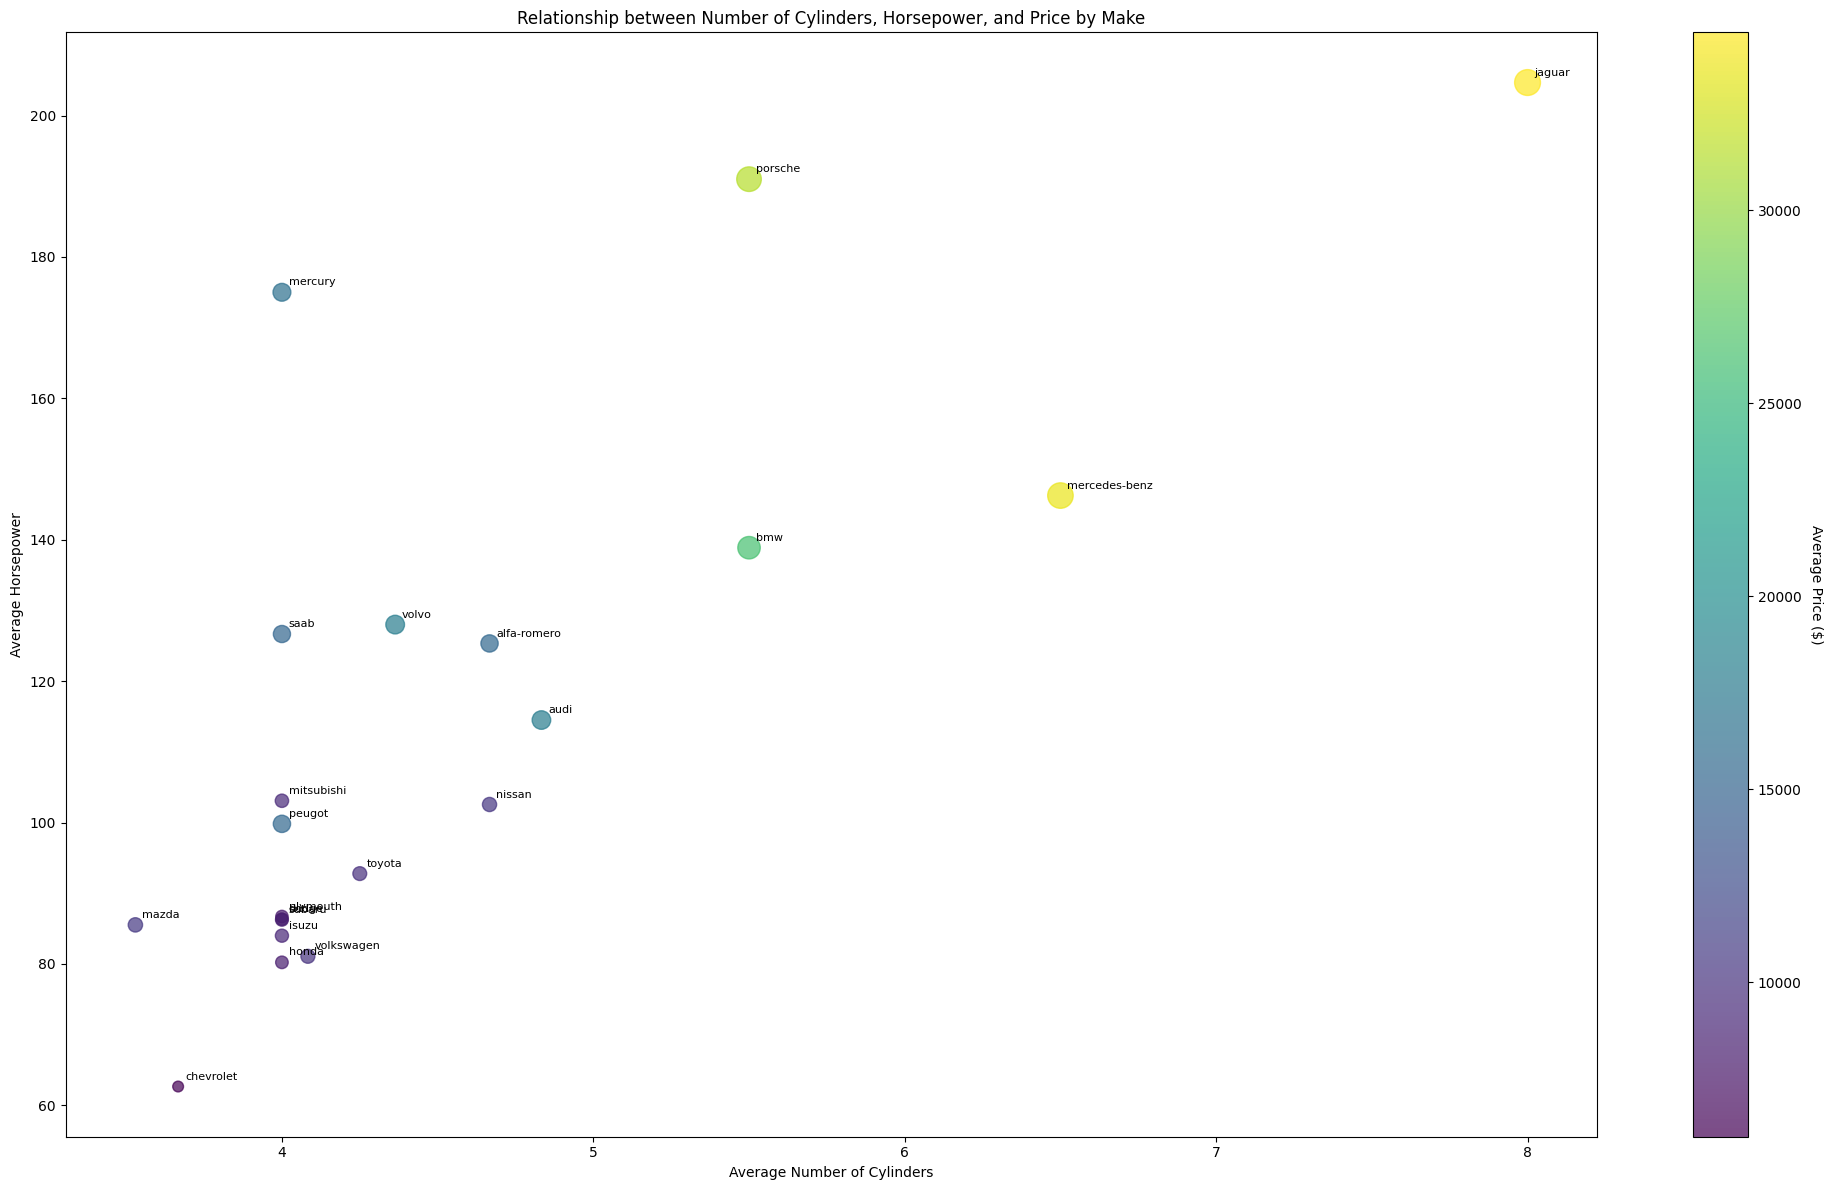

In [77]:
# Create the scatter plot
plt.figure(figsize=(20, 12))

scatter = plt.scatter(make_avg['num-of-cylinders'], make_avg['horsepower'], 
                      s=make_avg['price'] / 100,  # Adjust size for visibility
                      c=make_avg['price'], cmap='viridis', alpha=0.7)

plt.xlabel('Average Number of Cylinders')
plt.ylabel('Average Horsepower')
plt.title('Relationship between Number of Cylinders, Horsepower, and Price by Make')

# Add a colorbar to represent price
cbar = plt.colorbar(scatter)
cbar.set_label('Average Price ($)', rotation=270, labelpad=15)

# Add labels for each make
for i, make in enumerate(make_avg['make']):
    plt.annotate(make, (make_avg['num-of-cylinders'][i], make_avg['horsepower'][i]),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

In [78]:
# Calculate correlations
corr_cyl_hp = make_avg['num-of-cylinders'].corr(make_avg['horsepower'])
corr_cyl_price = make_avg['num-of-cylinders'].corr(make_avg['price'])
corr_hp_price = make_avg['horsepower'].corr(make_avg['price'])

print("Key Findings:")
print(f"1. Correlation between Average Number of Cylinders and Average Horsepower: {corr_cyl_hp:.2f}")
print(f"2. Correlation between Average Number of Cylinders and Average Price: {corr_cyl_price:.2f}")
print(f"3. Correlation between Average Horsepower and Average Price: {corr_hp_price:.2f}")

Key Findings:
1. Correlation between Average Number of Cylinders and Average Horsepower: 0.76
2. Correlation between Average Number of Cylinders and Average Price: 0.89
3. Correlation between Average Horsepower and Average Price: 0.88


In [79]:
# Find the make with the highest horsepower-to-cylinder ratio
make_avg['hp_per_cylinder'] = make_avg['horsepower'] / make_avg['num-of-cylinders']
best_ratio = make_avg.loc[make_avg['hp_per_cylinder'].idxmax()]
print("\n4. Make with highest average horsepower per cylinder:")
print(f"   Make: {best_ratio['make']}")
print(f"   Avg Cylinders: {best_ratio['num-of-cylinders']:.2f}, Avg Horsepower: {best_ratio['horsepower']:.2f}, Avg Price: ${best_ratio['price']:.2f}")


4. Make with highest average horsepower per cylinder:
   Make: mercury
   Avg Cylinders: 4.00, Avg Horsepower: 175.00, Avg Price: $16503.00


In [80]:
# Find overall average values
avg_cylinders = make_avg['num-of-cylinders'].mean()
avg_hp = make_avg['horsepower'].mean()
avg_price = make_avg['price'].mean()
print(f"\n5. Overall average values:")
print(f"   Cylinders: {avg_cylinders:.2f}, Horsepower: {avg_hp:.2f}, Price: ${avg_price:.2f}")


5. Overall average values:
   Cylinders: 4.55, Horsepower: 114.35, Price: $15340.91


#### Final observations and key findings


##### Price, horsepower, price-per-horsepower
The graphs indicates the relationship between the most expensive and cheap car makes as well as their corresponding horsepower. 

The most expensive car makes are Mercedes Benz, BMW and Porsche and the cheapest are Subaru, Chevrolet, Mazda, Toyota and Mitsubishi. 

When considering price per horsepower, Porsche would be a great car if you do want a luxury car but do not want to pay top dollar and if you want a car with relatively high horsepower. 
When you want to buy a car that is cheap but want a car with as high as possible horsepower then the Chevrolet make would be a good consideration as it has the highest horsepower from the top 5 cheapest cars. 

##### Top 5 most popular car makes
This graph indicates the most popular cars. At first place there is Toyota. This could be because they have competitive market prices and are readily available.

#### Top 10 car makes with the highest average MPG
This graph uncovers the top 10 car makes with the highest average miles per gallon (MPG). The best car make to consider when you want a fuel efficient  
car is Chevrolet. 


#### Car average price by engine location
This graph shows the average car price by engine location. By far the most expensive cars are those with the engines at the back of the car. The average price difference is $21,591.69.

##### Percentage of body types by car make
When taking into consideration of car body type the most common is the sedan as indicated in figure 5. This could indicate buyer preference.
This could also reflect practicality and functionality.

##### Average MPG vs average peak RPM by car make
The graph shows there is a weak positive correlation between RPM and MPG meaning that there is a slight tendency for MPG to increase as the RPM increases. Because of this weak correlation one cannot decisively indicate that the cars would be more fuel efficient. There are other factors which come into play as well when determining this.

##### Average MPG vs average horsepower vs price by car make
The graph shows the relation between the average MPG, horsepower and price. 
This graph indicates that there is a strong negative correlation between horsepower and the average MPG. This means that the higher the horsepower the lower the MPG would be. There is also a strong positive correlation between average horsepower and price. This means that the more horsepower a car has the more it will cost. Finally, there is a strong negative correlation between the average MPG and the average price. This means that cheaper cars tend to have higher MPG. If one would to be in the market for a car with the best average MPG and horsepower the recommended car would be a Porsche. 

##### Number of cylinders vs horsepower vs price by car make

The graph depicts the relationship between the number of cylinders a car has, the horsepower, price and make of the cars. There is a relatively positive correlation between the number of cylinders a car has and the average horsepower. Meaning the more cylinders the, generally the more horsepower the car has. The graph also indicates that the more cylinders a car has the more a car would cost. The make of car which has the highest average horsepower per cylinder would be Mercury. 

#### References:
Shovic, J & Simpson, A. 2019. Python all in one for dummies. John Wiley & Sons. New Jersey, USA.

Mark - A friend of mine also guided me when I struggled.